In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [53]:
import os
from os.path import join
import matplotlib.pyplot as plt
import cv2
from utilities.convert_to_semantic_maps.convert_to_semantic_maps_utils import convert_label_me_json_to_semantic_mask

In [6]:
semantic_map_save_dir = '../../utilities/_sample_results/semantic_maps'
os.makedirs(semantic_map_save_dir, exist_ok=True)

# Get semantic map for a single image

You have the option to keep the instance_info in the semantic map if you want or not. The standard method allows you to generate masks for semantic segmentation

In [10]:
label_me_json_name = 't80_VID03_000180.json' 
label_me_json_dir = '../../utilities/_sample_files/VID03_t80_sparse/ann_dir/'
img_dir = '../../utilities/_sample_files/VID03_t80_sparse/img_dir/'

In [12]:
img_name = label_me_json_name.replace('.json', '.png') # get corresponding image name
label_me_json_path = join(label_me_json_dir, label_me_json_name) # path for label_me_json.  
img_path = join(img_dir, img_name)

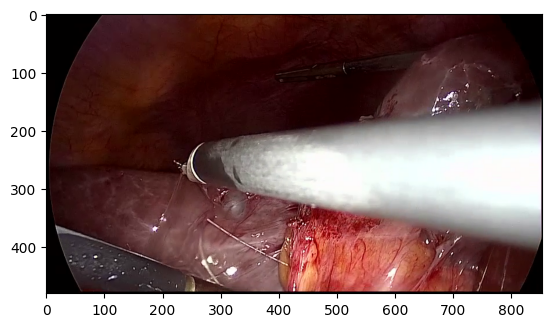

In [16]:
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [36]:
convert_label_me_json_to_semantic_mask(label_me_json_path, img_path, semantic_map_save_dir)

Generated semantic mask for t80_VID03_000180.png and stored in ../../utilities/_sample_results/semantic_maps\t80_VID03_000180.png


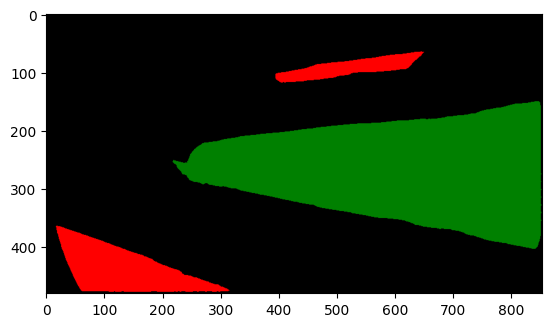

In [37]:
semantic_map_path = join(semantic_map_save_dir, img_name)
semantic_mask = cv2.cvtColor(cv2.imread(semantic_map_path), cv2.COLOR_BGR2RGB)
plt.imshow(semantic_mask)

In [38]:
import numpy as np
reshaped_img = semantic_mask.reshape(-1, semantic_mask.shape[-1])
unique_colors = np.unique(reshaped_img, axis=0)
print(unique_colors)

[[  0   0   0]
 [  0 128   0]
 [255   0   0]]


Note that we have two other colours apart from the background (0,0,0). Hence instance information is lost, well, not really, because connected component, would get you the instance component, except when they are touching. We can eliminate this problem if we are using annotations with different colours

# Keep instance information in the semantic map. 

If you want the instance information to be preserved, you can also do this. 

We keep the instance mask by changing the B value in the RGB map. R, G for a class always stay the same, but B channel changes based on the instane id

For instane 1, we use the standard class colour, however for classes with a second instance, we add 20 to the B channel (wrapped around 256).

Use the keep_instance_info flag to activate this in convert_label_me_json_to_semantic_mask


In [50]:
convert_label_me_json_to_semantic_mask(label_me_json_path, img_path, semantic_map_save_dir,keep_instance_info=True)

Generated semantic mask for t80_VID03_000180.png and stored in ../../utilities/_sample_results/semantic_maps\t80_VID03_000180.png


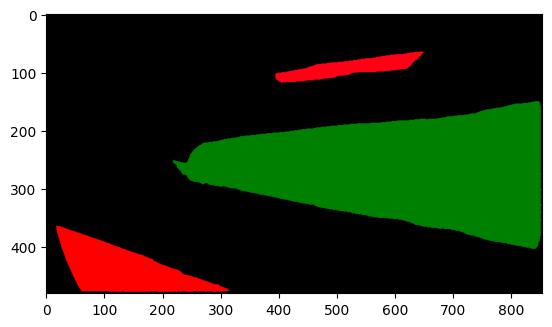

In [57]:
semantic_map_path = join(semantic_map_save_dir, img_name)
semantic_mask = cv2.cvtColor(cv2.imread(semantic_map_path), cv2.COLOR_BGR2RGB)
plt.imshow(semantic_mask)

In [58]:
import numpy as np
reshaped_img = semantic_mask.reshape(-1, semantic_mask.shape[-1])
unique_colors = np.unique(reshaped_img, axis=0)
print(unique_colors)

[[  0   0   0]
 [  0 128   0]
 [255   0   0]
 [255   0  20]]


Note there is an extra red colour with [255, 0 and 20]. 

If you  want to implement your own algroitm for keeping instance info see get_colour_from_class_name_instance_id in  convert_to_semantic_maps_utils.py

# Generating Semantic maps for a whole folder

In [54]:
from utilities.convert_to_semantic_maps.convert_to_semantic_maps_utils import  convert_label_me_json_to_semantic_mask_for_directory

In [55]:
label_me_json_dir = '../../utilities/_sample_files/VID03_t80_sparse/ann_dir/'
img_dir = '../../utilities/_sample_files/VID03_t80_sparse/img_dir/'

In [56]:
convert_label_me_json_to_semantic_mask_for_directory(label_me_json_dir, img_dir, semantic_map_save_dir, keep_instance_info=True)

Generated semantic mask for t80_VID03_000000.png and stored in ../../utilities/_sample_results/semantic_maps\t80_VID03_000000.png
Generated semantic mask for t80_VID03_000030.png and stored in ../../utilities/_sample_results/semantic_maps\t80_VID03_000030.png
Generated semantic mask for t80_VID03_000060.png and stored in ../../utilities/_sample_results/semantic_maps\t80_VID03_000060.png
Generated semantic mask for t80_VID03_000090.png and stored in ../../utilities/_sample_results/semantic_maps\t80_VID03_000090.png
Generated semantic mask for t80_VID03_000120.png and stored in ../../utilities/_sample_results/semantic_maps\t80_VID03_000120.png
Generated semantic mask for t80_VID03_000150.png and stored in ../../utilities/_sample_results/semantic_maps\t80_VID03_000150.png
Generated semantic mask for t80_VID03_000180.png and stored in ../../utilities/_sample_results/semantic_maps\t80_VID03_000180.png
Generated semantic mask for t80_VID03_000210.png and stored in ../../utilities/_sample_res